<a href="https://colab.research.google.com/github/Oramgee/-oramge-.github.io/blob/gh-pages/assignment_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis

## import library

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

In [5]:

from google.colab import files
uploaded = files.upload()

fname_data  = 'assignment_12_data.txt'
feature0    = np.genfromtxt(fname_data, delimiter=',')

number_data     = np.size(feature0, 0)
number_feature  = np.size(feature0, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

Saving assignment_12_data.txt to assignment_12_data (2).txt
number of data : 50
number of feature : 2


## plot the input data

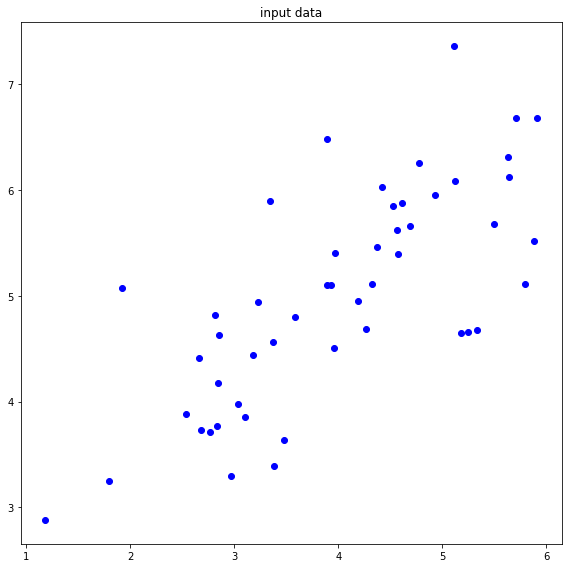

In [6]:
plt.figure(figsize=(8,8))   
plt.title('input data')

x0 = feature0[:,0]
y0 = feature0[:,1]

plt.scatter(x0, y0, color='blue')

plt.tight_layout()
plt.show()

## Normalization (Z-scoring)
- shape of feature = $n \times m$ where $n$ is the number of data and $m$ is the dimension of features

In [35]:
def normalize(feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    feature_normalize = (feature - np.mean(feature, axis=0)) /  np.std(feature, axis=0)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return feature_normalize

In [36]:
feature = normalize(feature0)
x   = feature[:, 0]
y   = feature[:, 1]

min_x = np.min(x)
min_y = np.min(y)

max_x = np.max(x)
max_y = np.max(y)

## compute covariance matrix
- shape of feature = $n \times m$ where $n$ is the number of data and $m$ is the dimension of features

In [37]:
def compute_covariance(feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    Sigma = (feature.T) @ feature / number_data
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return Sigma

## compute principal components
- `np.linalg.eig`
- `argsort()`
- return the eigenvalues and the eigenvectors in a decreasing order according to the eigenvalues

In [33]:
def compute_principal_component(feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    eigen_values, eigen_vectors = np.linalg.eig(compute_covariance(feature))

    sort_idx = np.argsort(eigen_values)
    eigen_values = eigen_values[sort_idx]
    eigen_vectors = eigen_vectors[sort_idx]
    
    principal_component_1 = eigen_vectors[0]
    principal_component_2 = eigen_vectors[1]

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
     
    return (principal_component_1, principal_component_2)

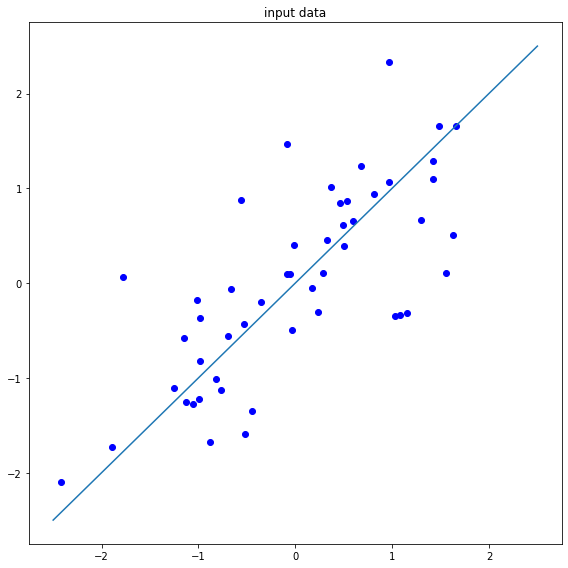

In [38]:
plt.figure(figsize=(8,8))   
plt.title('input data')

plt.plot([-2.5, 2.5], [-2.5,2.5 ])
plt.scatter(x, y, color='blue')

plt.tight_layout()
plt.show()

## compute the projection of point onto the axis
- `np.matmul`
- `np.dot`
- shape of feature = $n \times m$ where $n$ is the number of data and $m$ is the dimension of features
- shape of vector = $m \times 1$ where $m$ is the dimension of features

In [32]:
def compute_projection_onto_line(feature, vector):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    vector = vector.reshape(-1,1)
    P = (vector @ vector.T) / np.sum((vector.T @ vector))
    return feature @ P
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return projection

## compute the principal components and the projection of feature

In [19]:

(principal_component_1, principal_component_2) = compute_principal_component(feature)

projection1 = compute_projection_onto_line(feature, principal_component_1)
projection2 = compute_projection_onto_line(feature, principal_component_2)

---

---

## functions for presenting the results

---

---

In [39]:
def function_result_01():
   
    plt.figure(figsize=(8,8))
    plt.title('data normalized by z-scoring')
    plt.scatter(x, y, color='blue')

    plt.xlim(min_x - 0.5,   max_x + 0.5)
    plt.ylim(min_y - 0.5,   max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [40]:
def function_result_02():

    plt.figure(figsize=(8,8))
    plt.title('principal components')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    plt.scatter(x, y, color='blue')
    plt.plot([-2.5, 2.5], [-2.5*principal_component_1[1]/principal_component_1[0], 2.5*principal_component_1[1]/principal_component_1[0]])
    plt.plot([-2.5, 2.5], [-2.5*principal_component_2[1]/principal_component_2[0], 2.5*principal_component_2[1]/principal_component_2[0]])

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [22]:
def function_result_03():

    plt.figure(figsize=(8,8))
    plt.title('first principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    plt.scatter(x, y, color='blue')
    plt.plot([-2.5, 2.5], [-2.5*principal_component_1[1]/principal_component_1[0], 2.5*principal_component_1[1]/principal_component_1[0]])


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [23]:
def function_result_04():

    plt.figure(figsize=(8,8))
    plt.title('second principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    plt.scatter(x, y, color='blue')
    plt.plot([-2.5, 2.5], [-2.5*principal_component_2[1]/principal_component_2[0], 2.5*principal_component_2[1]/principal_component_2[0]])


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [25]:
def function_result_05():

    plt.figure(figsize=(8,8))
    plt.title('projection onto the first principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks   
    
    plt.scatter(x, y, color='blue')
    plt.plot([-2.5, 2.5], [-2.5*principal_component_1[1]/principal_component_1[0], 2.5*principal_component_1[1]/principal_component_1[0]])
    plt.scatter(projection1[:,0], projection1[:,1])
    #



    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()


In [26]:
def function_result_06():

    plt.figure(figsize=(8,8))
    plt.title('projection onto the second principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    plt.scatter(x, y, color='blue')
    plt.plot([-2.5, 2.5], [-2.5*principal_component_2[1]/principal_component_2[0], 2.5*principal_component_2[1]/principal_component_2[0]])
    plt.scatter(projection2[:,0], projection2[:,1])


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [27]:
def function_result_07():

    plt.figure(figsize=(8,8))
    plt.title('projection onto the first principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    plt.scatter(x, y, color='blue')
    plt.plot([-2.5, 2.5], [-2.5*principal_component_1[1]/principal_component_1[0], 2.5*principal_component_1[1]/principal_component_1[0]])
    plt.scatter(projection1[:,0], projection1[:,1])
    for i in range(number_data):
        plt.plot([projection1[i,0],x[i]], [projection1[i,1],y[i]], c="black")


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [28]:
def function_result_08():

    plt.figure(figsize=(8,8))
    plt.title('projection to the second principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    plt.scatter(x, y, color='blue')
    plt.plot([-2.5, 2.5], [-2.5*principal_component_2[1]/principal_component_2[0], 2.5*principal_component_2[1]/principal_component_2[0]])
    plt.scatter(projection2[:,0], projection2[:,1])
    for i in range(number_data):
        plt.plot([projection2[i,0],x[i]], [projection2[i,1],y[i]], c="black")


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

---

---

## results

---

---

**************************************************
## [RESULT 01]
**************************************************


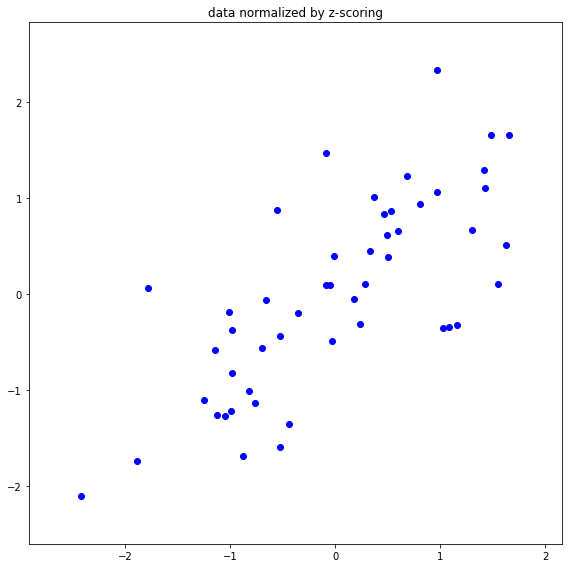

**************************************************
## [RESULT 02]
**************************************************


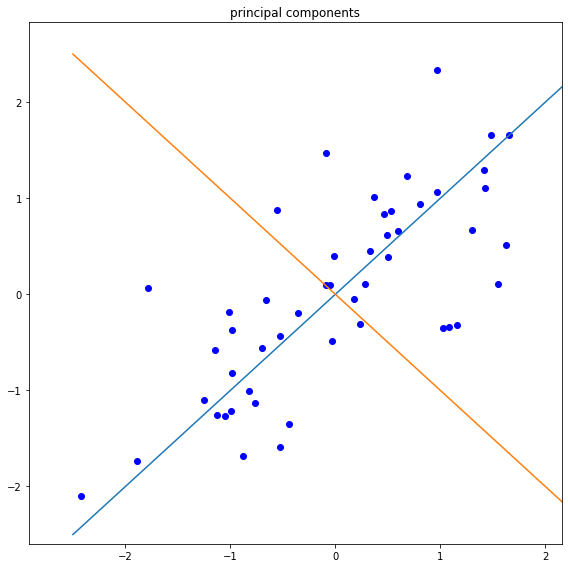

**************************************************
## [RESULT 03]
**************************************************


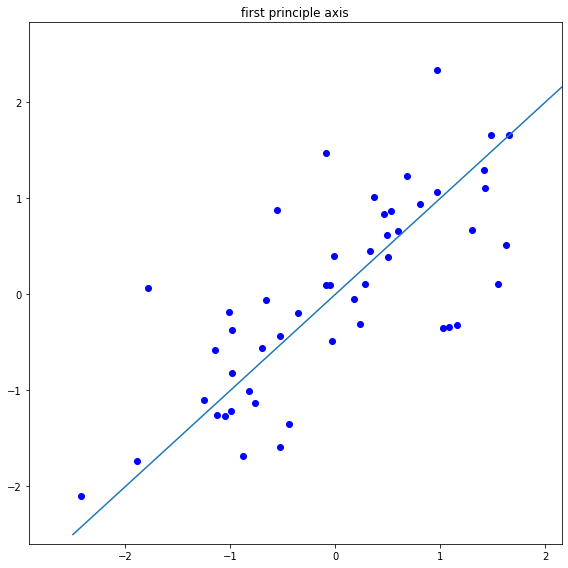

**************************************************
## [RESULT 04]
**************************************************


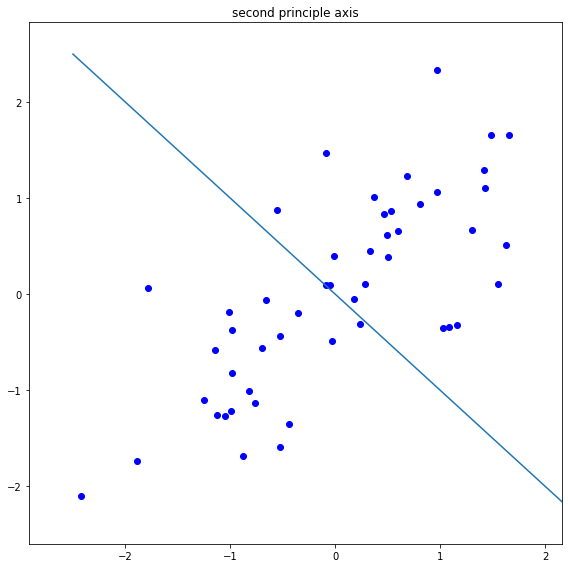

**************************************************
## [RESULT 05]
**************************************************


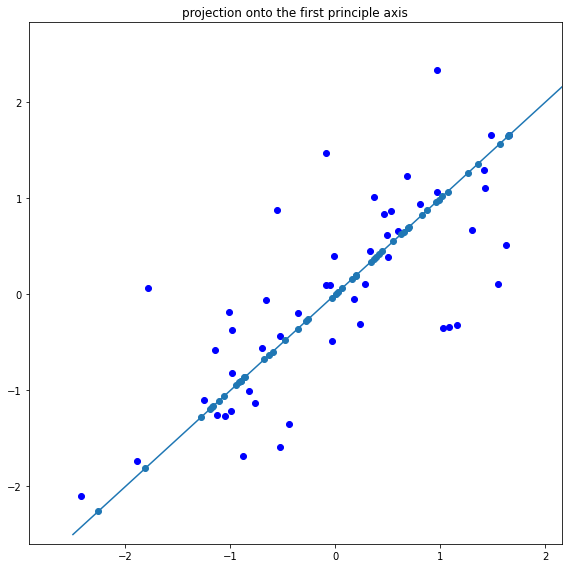

**************************************************
## [RESULT 06]
**************************************************


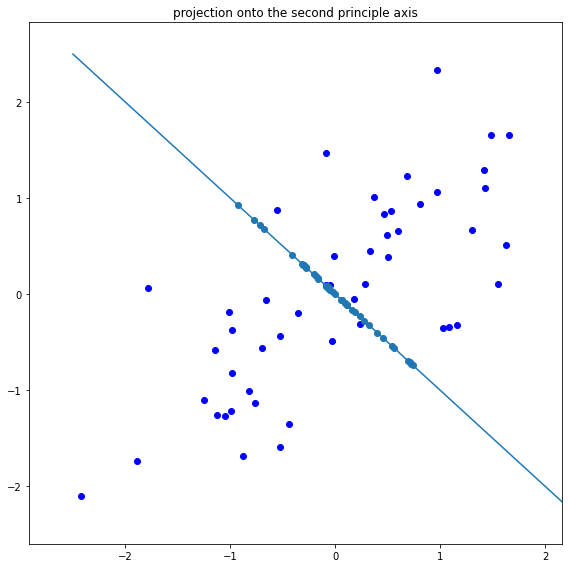

**************************************************
## [RESULT 07]
**************************************************


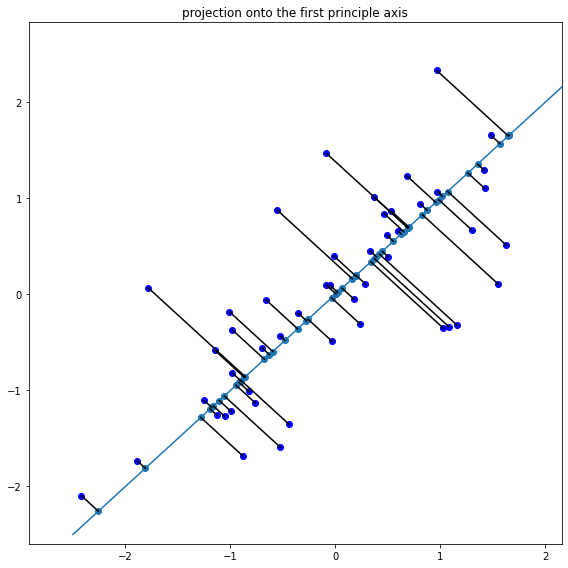

**************************************************
## [RESULT 08]
**************************************************


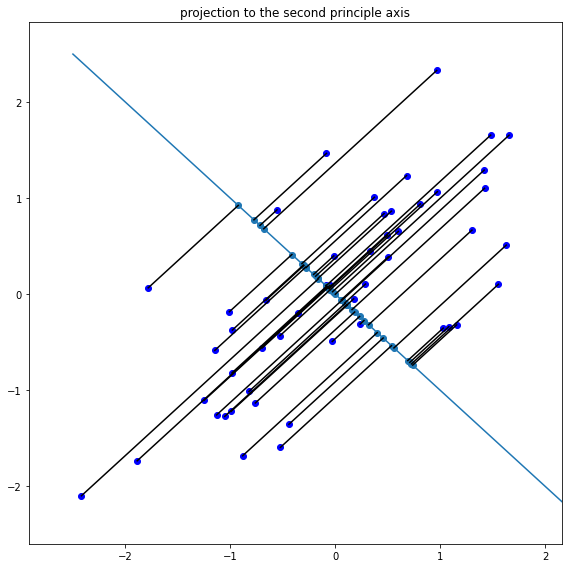

In [29]:
number_result = 8

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)